# Imports

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import *
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Random Forest

In [1]:
def train_randomForest(x_train, y_train, x_test, y_test, n_ofTrees):
    clf = RandomForestClassifier(n_estimators=n_ofTrees, max_depth=6, random_state=42,min_samples_split=3)

    # Train the model
    clf.fit(x_train, y_train)

    # Make predictions on the testing data
    y_pred = clf.predict(x_test)

    # Evaluate the performance of the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    return clf

# Cross Validation

In [93]:
def evaluate_cv_model(model, X_train, y_train, kFolds):
    a_score = cross_val_score(model, X_train, y_train, cv=kFolds, scoring='accuracy')
    accuracy = a_score.mean()

    return accuracy

# Confusion Matrix & Classification Report

In [101]:
def plot_confusionMatrix (clf, y_test, X_test):
    labels = [0,1,2,3,4,5,6,7,8]
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Blues")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    report = classification_report(y_test, y_pred)
    plt.show()

    return report


# ECG Data

In [73]:
# read csv
df_ECG = pd.read_csv('preprocessed_ECG.csv')
X_ECG = df_ECG.drop(['target','Unnamed: 0'] , axis=1)
y_ECG = df_ECG.target

Accuracy: 0.9036144578313253
Accuracy:  0.9548192771084337


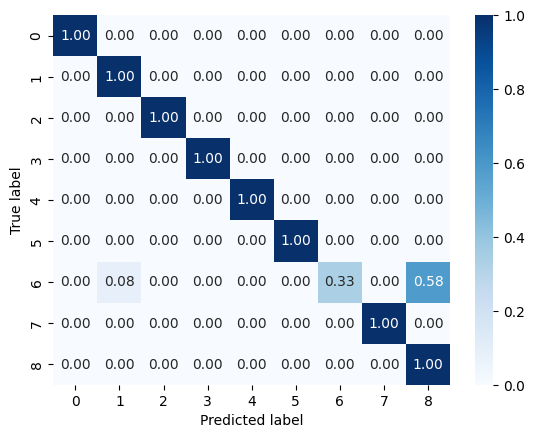

In [102]:

X_train_ECG, X_test_ECG, y_train_ECG, y_test_ECG = train_test_split(X_ECG, y_ECG, test_size=0.2, random_state=42)

clf_ECG = train_randomForest(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 100)

# call function Misara
accuracy = evaluate_cv_model(clf_ECG, X_train_ECG, y_train_ECG, 4)
print("Accuracy: ", accuracy)

report_ECG = plot_confusionMatrix (clf_ECG, y_test_ECG, X_test_ECG)





In [103]:
print(report_ECG)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        11
           6       1.00      0.33      0.50        12
           7       1.00      1.00      1.00        11
           8       0.53      1.00      0.70         8

    accuracy                           0.90        83
   macro avg       0.94      0.93      0.91        83
weighted avg       0.94      0.90      0.89        83



# EEG Data

In [30]:
df_EEG = pd.read_csv('preprocessed_EEG.csv')
X_EEG = df_EEG.drop(['target','Unnamed: 0'] , axis=1)
y_EEG = df_EEG.target

Accuracy: 0.6987951807228916
Accuracy:  0.6285263003232443


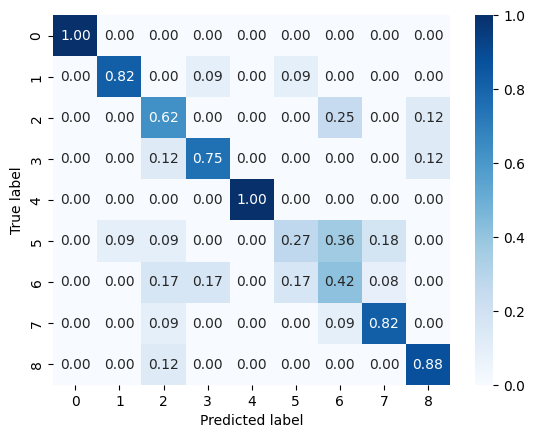

In [104]:

X_train_EEG, X_test_EEG, y_train_EEG, y_test_EEG = train_test_split(X_EEG, y_EEG, test_size=0.2, random_state=42)

clf_EEG = train_randomForest(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 100)

accuracy_EEG = evaluate_cv_model(clf_EEG, X_train_EEG, y_train_EEG, 4)
print("Accuracy: ", accuracy_EEG)

report_EEG = plot_confusionMatrix (clf_EEG, y_test_EEG, X_test_EEG)


In [105]:
print(report_EEG)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.90      0.82      0.86        11
           2       0.45      0.62      0.53         8
           3       0.67      0.75      0.71         8
           4       1.00      1.00      1.00         9
           5       0.50      0.27      0.35        11
           6       0.42      0.42      0.42        12
           7       0.75      0.82      0.78        11
           8       0.78      0.88      0.82         8

    accuracy                           0.70        83
   macro avg       0.72      0.73      0.72        83
weighted avg       0.70      0.70      0.69        83



# EEG + ECG Data

In [32]:
df_EEG_ECG = pd.read_csv('Final_Data.csv')
X_EEG_ECG = df_EEG_ECG.drop(['target','Unnamed: 0'] , axis=1)
y_EEG_ECG = df_EEG_ECG.target

Accuracy: 0.9156626506024096
Accuracy:  0.9548192771084337


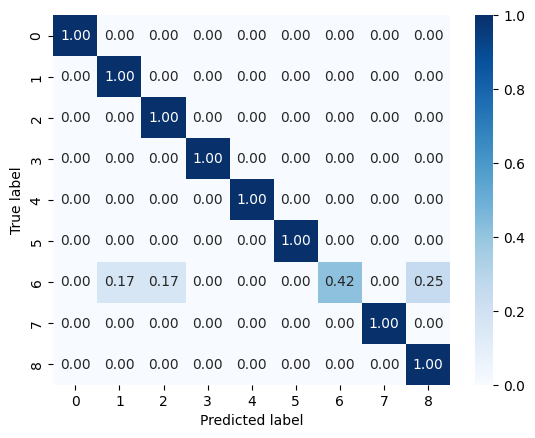

In [106]:

X_train_EEG_ECG, X_test_EEG_ECG, y_train_EEG_ECG, y_test_EEG_ECG = train_test_split(X_EEG_ECG, y_EEG_ECG, test_size=0.2, random_state=42)

clf_EEG_ECG = train_randomForest(X_train_EEG_ECG, y_train_EEG_ECG, X_test_EEG_ECG, y_test_EEG_ECG, 100)

accuracy = evaluate_cv_model(clf_EEG_ECG, X_train_EEG_ECG, y_train_EEG_ECG, 4)
print("Accuracy: ", accuracy)

report_EEG_ECG = plot_confusionMatrix (clf_EEG_ECG, y_test_EEG_ECG, X_test_EEG_ECG)



In [107]:
print(report_EEG_ECG)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.85      1.00      0.92        11
           2       0.80      1.00      0.89         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        11
           6       1.00      0.42      0.59        12
           7       1.00      1.00      1.00        11
           8       0.73      1.00      0.84         8

    accuracy                           0.92        83
   macro avg       0.93      0.94      0.92        83
weighted avg       0.93      0.92      0.90        83

